In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle

import datetime as dt

%matplotlib inline
f = open('recs.csv')
data = pd.read_csv(f,sep=',', header='infer', parse_dates=[1])

In [8]:
data.shape

(12083, 931)

In [26]:
X = data.iloc[:,0:839]
a = X['UR'].copy()
a[a == 'U'] = 1
a[a == 'R'] = 0
X['UR'] = a
X = X.drop('METROMICRO',axis=1).drop('DOEID',1)
X['NOCRCASH'] = X['NOCRCASH'].fillna(method = 'pad')
X['NKRGALNC'] = X['NKRGALNC'].fillna(method = 'pad')

In [42]:
y1 = data['TOTALBTUSPH']/data['TOTSQFT']
y3 = data['TOTALBTUSPH']/data['TOTHSQFT']
y2 = data['TOTALBTUCOL']/data['TOTSQFT']

In [64]:
y3.isnull().sum()

446

In [43]:
from sklearn.ensemble import ExtraTreesRegressor
model1 = ExtraTreesRegressor().fit(X,y1)
model2 = ExtraTreesRegressor().fit(X,y2)
model3 = ExtraTreesRegressor().fit(X,y3)

In [44]:
a1  = model1.feature_importances_
a2  = model2.feature_importances_
a3  = model3.feature_importances_

In [60]:
a3

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0

In [46]:
X.columns.values

array(['REGIONC', 'DIVISION', 'REPORTABLE_DOMAIN', 'TYPEHUQ', 'NWEIGHT',
       'HDD65', 'CDD65', 'HDD30YR', 'CDD30YR', 'Climate_Region_Pub',
       'AIA_Zone', 'UR', 'KOWNRENT', 'CONDCOOP', 'YEARMADE',
       'YEARMADERANGE', 'OCCUPYYRANGE', 'CONVERSION', 'ORIG1FAM',
       'LOOKLIKE', 'NUMFLRS', 'NUMAPTS', 'WALLTYPE', 'ROOFTYPE', 'STUDIO',
       'NAPTFLRS', 'STORIES', 'TYPEHUQ4', 'BEDROOMS', 'NCOMBATH',
       'NHAFBATH', 'OTHROOMS', 'TOTROOMS', 'CELLAR', 'CRAWL', 'CONCRETE',
       'BASEFIN', 'FINBASERMS', 'BASEHEAT', 'BASEHT2', 'PCTBSTHT',
       'BASECOOL', 'BASECL2', 'PCTBSTCL', 'BASEUSE', 'ATTIC', 'ATTICFIN',
       'FINATTRMS', 'ATTCHEAT', 'ATTCHT2', 'PCTATTHT', 'ATTCCOOL',
       'ATTCCL2', 'PCTATTCL', 'ATTICUSE', 'PRKGPLC1', 'SIZEOFGARAGE',
       'GARGLOC', 'GARGHEAT', 'GARGCOOL', 'PRKGPLC2', 'SIZEOFDETACH',
       'OUTLET', 'ZKOWNRENT', 'ZCONDCOOP', 'ZYEARMADE', 'ZYEARMADERANGE',
       'ZOCCUPYYRANGE', 'ZCONVERSION', 'ZORIG1FAM', 'ZLOOKLIKE',
       'ZNUMFLRS', 'ZNUMAPTS'

In [55]:
d = {'fname':X.columns.values, 'score1':a1,'score2':a2, 'score3':a3}
fsl = pd.DataFrame(d)
fsl.sort_values(ascending=False, by='score1',inplace=True)

In [65]:
fsl.sort_values(ascending=False, by='score1')

,fname,score1,score2,score3
434,HEATOTH,0.070453,9.215473e-05,0.0
825,TOTSQFT,0.063242,3.574839e-03,0.0
29,NCOMBATH,0.060492,1.303224e-03,0.0
665,UGWARM,0.054584,3.168483e-04,0.0
2,REPORTABLE_DOMAIN,0.046278,2.711046e-04,0.0
428,FUELHEAT,0.043907,2.975707e-04,0.0
827,TOTHSQFT,0.042971,1.080083e-03,0.0
826,TOTSQFT_EN,0.036790,3.230212e-03,0.0
1,DIVISION,0.029643,5.757892e-04,0.0
5,HDD65,0.028483,4.998621e-03,0.0


In [115]:
newX = data[['HEATOTH','TOTSQFT','NCOMBATH','UGWARM','REPORTABLE_DOMAIN','FUELHEAT','TOTHSQFT','DIVISION','HDD65','FOWARM','AIA_Zone']]
# newY = data[['TOTALBTUSPH']]
newY = y1
from sklearn.tree import DecisionTreeRegressor as DTR

In [117]:
from sklearn.cross_validation import cross_val_score
levels1 = range(1,12)
s = [0]*len(levels1)
for i in levels1:
    treeA = DTR(max_depth = i).fit(newX,newY)
    score = cross_val_score(treeA, newX, newY, cv=10)
    s[i-1] = np.mean(score)
    print(i,'the cross validation result of treeA is: \n',np.mean(score))

1 the cross validation result of treeA is: 
 0.155144331021
2 the cross validation result of treeA is: 
 0.229539415722
3 the cross validation result of treeA is: 
 0.413162358134
4 the cross validation result of treeA is: 
 0.508577687516
5 the cross validation result of treeA is: 
 0.571163008457
6 the cross validation result of treeA is: 
 0.596099532127
7 the cross validation result of treeA is: 
 0.577960689257
8 the cross validation result of treeA is: 
 0.625391508196
9 the cross validation result of treeA is: 
 0.572216183608
10 the cross validation result of treeA is: 
 0.586951565618
11 the cross validation result of treeA is: 
 0.545466603232


<function matplotlib.pyplot.show>

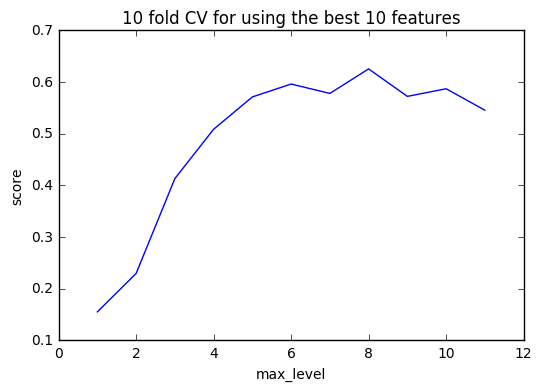

In [132]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
plt.plot(levels1,s)
ax1.set_xlabel('max_level')
ax1.set_ylabel('score')
# plt.ylim(0,0.7)
plt.title('10 fold CV for using the best 10 features')
plt.show

<function matplotlib.pyplot.show>

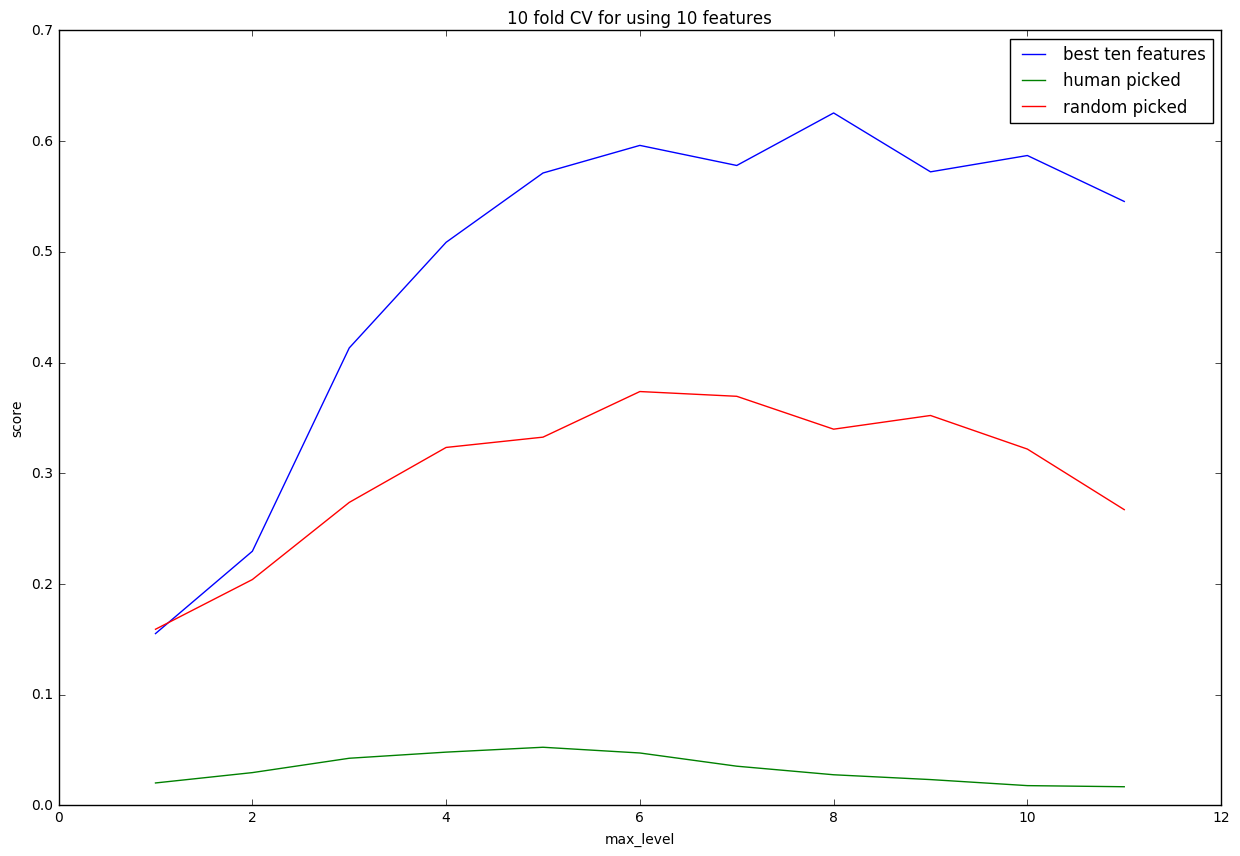

In [139]:
fig1 = plt.figure(figsize = (15,10))
ax1 = fig1.add_subplot(111)
plt.plot(levels1,s,label = 'best ten features')
# plt.plot(levels1,s2)
plt.plot(levels1,s3,label = 'human picked')
plt.plot(levels1,s4,label = 'random picked')
plt.legend()
ax1.set_xlabel('max_level')
ax1.set_ylabel('score')
# plt.ylim(0,0.7)

plt.title('10 fold CV for using 10 features')
plt.show

In [119]:
levels2 = range(1,20,2)
s2 = [0]*len(levels2)
for i in range(0,len(levels2)):
    d = levels2[i]
    treeMeta = DTR(max_depth=d).fit(X, newY)
    score2 = cross_val_score(treeMeta, X, newY, cv=10)
    s2[i] = np.mean(score2)
    print(i, 'the cross validation result of treeMeta is: \n',np.mean(score2))

0 the cross validation result of treeMeta is: 
 0.155144331021
1 the cross validation result of treeMeta is: 
 0.385266725574
2 the cross validation result of treeMeta is: 
 0.562784592289
3 the cross validation result of treeMeta is: 
 0.576229853948
4 the cross validation result of treeMeta is: 
 0.547250297534
5 the cross validation result of treeMeta is: 
 0.491255248898
6 the cross validation result of treeMeta is: 
 0.490781597622
7 the cross validation result of treeMeta is: 
 0.472132574529
8 the cross validation result of treeMeta is: 
 0.507979945371
9 the cross validation result of treeMeta is: 
 0.477649049267


<function matplotlib.pyplot.show>

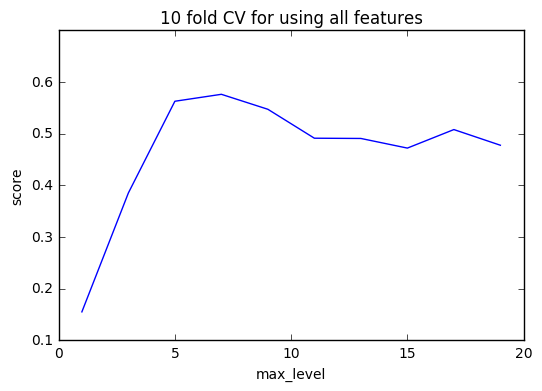

In [140]:
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
plt.plot(levels2,s2)
ax2.set_xlabel('max_level')
ax2.set_ylabel('score')
plt.title('10 fold CV for using all features')
plt.ylim(0.1,0.7)
plt.show

In [121]:
randX = X.iloc[:,np.random.permutation(X.shape[1])]
randX = randX.iloc[:,0:10]
s3 = [0]*len(levels1)
for i in levels1:
    treeRand = DTR(max_depth = i).fit(randX,newY)
    score = cross_val_score(treeRand, randX, newY, cv=10)
    s3[i-1] = np.mean(score)
    print(i,'the cross validation result of treeA is: \n',np.mean(score))

1 the cross validation result of treeA is: 
 0.0202328308647
2 the cross validation result of treeA is: 
 0.0295844157428
3 the cross validation result of treeA is: 
 0.0425465361317
4 the cross validation result of treeA is: 
 0.0480757210635
5 the cross validation result of treeA is: 
 0.0524824154239
6 the cross validation result of treeA is: 
 0.0473036331908
7 the cross validation result of treeA is: 
 0.0353778230958
8 the cross validation result of treeA is: 
 0.0276383964551
9 the cross validation result of treeA is: 
 0.0232840171145
10 the cross validation result of treeA is: 
 0.0178248982406
11 the cross validation result of treeA is: 
 0.0168176886112


<function matplotlib.pyplot.show>

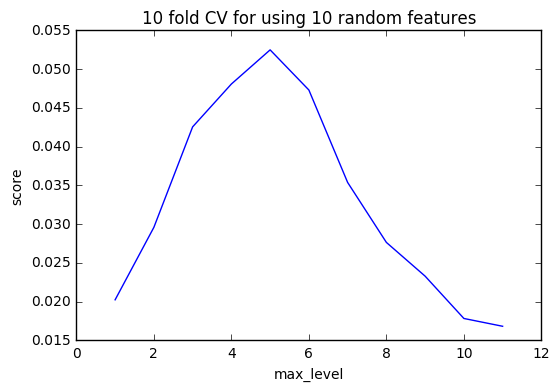

In [122]:
fig3 = plt.figure()
ax3 = fig3.add_subplot(111)
plt.plot(levels1,s3)
ax3.set_xlabel('max_level')
ax3.set_ylabel('score')
plt.title('10 fold CV for using 10 random features')
plt.show

In [125]:
humanX = X[['REPORTABLE_DOMAIN','HDD30YR','TYPEHUQ','Climate_Region_Pub','AIA_Zone','YEARMADE','WALLTYPE','ROOFTYPE','TOTSQFT','HEATOTH']]
s4 = [0]*len(levels1)
for i in levels1:
    treeRand = DTR(max_depth = i).fit(humanX,newY)
    score = cross_val_score(treeRand, humanX, newY, cv=10)
    s4[i-1] = np.mean(score)
    print(i,'the cross validation result of treeA is: \n',np.mean(score))


1 the cross validation result of treeA is: 
 0.159062233216
2 the cross validation result of treeA is: 
 0.203960519749
3 the cross validation result of treeA is: 
 0.273640875548
4 the cross validation result of treeA is: 
 0.323283646126
5 the cross validation result of treeA is: 
 0.332577570973
6 the cross validation result of treeA is: 
 0.373772201679
7 the cross validation result of treeA is: 
 0.369474905203
8 the cross validation result of treeA is: 
 0.339772811089
9 the cross validation result of treeA is: 
 0.352144578281
10 the cross validation result of treeA is: 
 0.321798511255
11 the cross validation result of treeA is: 
 0.267092944815


<function matplotlib.pyplot.show>

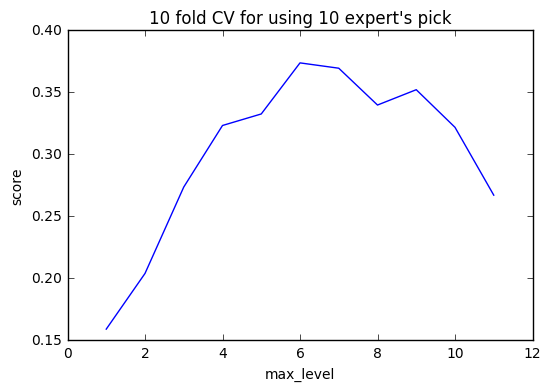

In [127]:
fig4 = plt.figure()
ax3 = fig4.add_subplot(111)
plt.plot(levels1,s4)
ax3.set_xlabel('max_level')
ax3.set_ylabel('score')
plt.title('10 fold CV for using 10 expert\'s pick')
plt.show

In [141]:
predict = treeA.predict(newX)

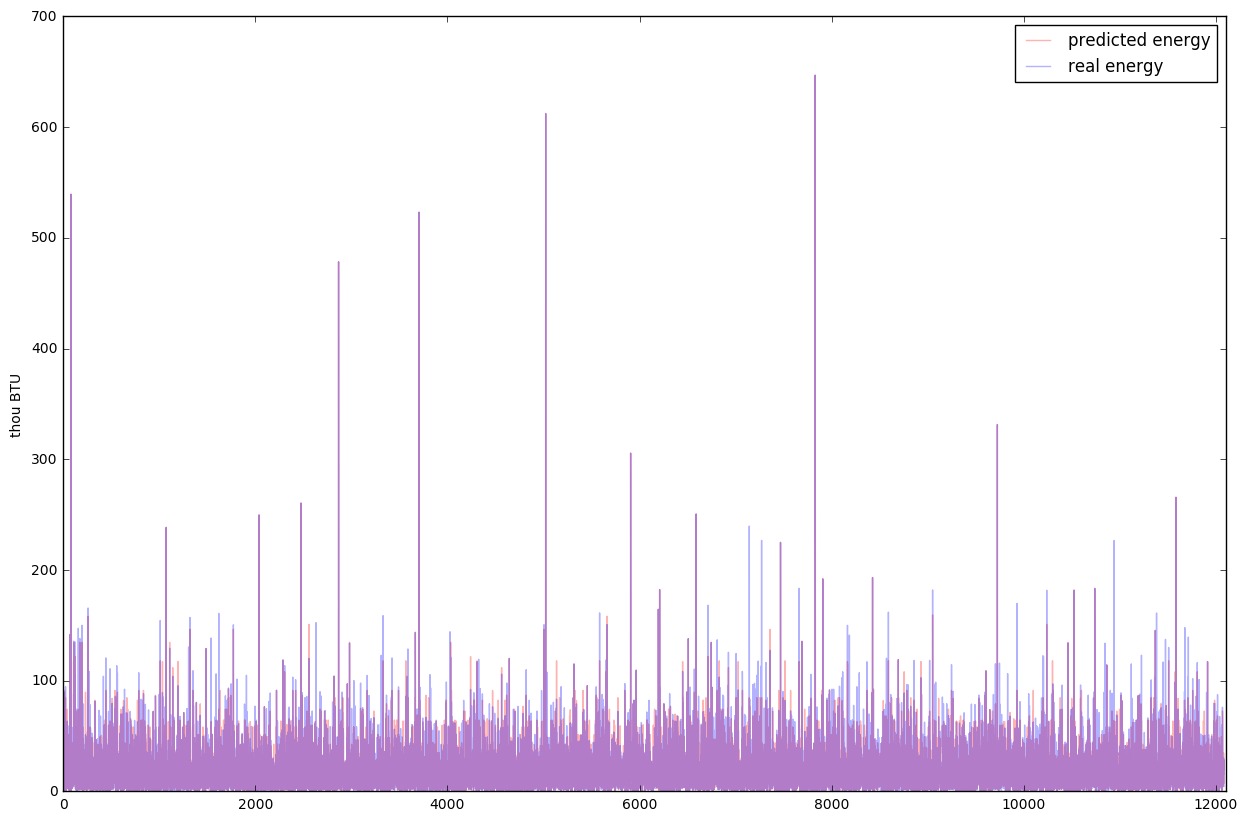

In [149]:
fig1 = plt.figure(figsize = (15,10))

plt.plot(predict,'r',alpha = 0.3,label = 'predicted energy')
plt.plot(newY,'b',alpha = 0.3,label = 'real energy')
plt.xlim(0,12100)
plt.ylabel('thou BTU')
plt.legend()
plt.show()